In [2]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.dates as mdates

In [3]:
# 유니코드 깨짐현상 해결
mlp.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
mlp.rcParams["font.family"] = 'NanumGothic'

In [4]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

In [144]:
from datetime import datetime, timedelta

In [6]:
%%time
mybicard = pd.read_parquet('/home/seho/data/mybicard.parquet', engine='pyarrow')

CPU times: user 22.4 s, sys: 8.42 s, total: 30.8 s
Wall time: 14.3 s


In [7]:
%%time
mybicard = mybicard.drop_duplicates()

CPU times: user 43.4 s, sys: 5.05 s, total: 48.4 s
Wall time: 48.3 s


In [8]:
# 수집일자 데이트 포맷으로 변환
mybicard["collectdate"] = pd.to_datetime(mybicard["collectdate"], format = "%Y%m%d")

In [9]:
# 전송일자 데이트 포맷으로 변환
mybicard["transdate"] = pd.to_datetime(mybicard["transdate"], format = "%Y%m%d %H:%M:%S")

In [10]:
# 요일, 날짜, 월 변수 생성
mybicard["dayofweek"] = mybicard["transdate"].dt.dayofweek
dow_dict = {0:"월", 1:"화", 2:"수", 3:"목", 4:"금", 5:"토", 6:"일"}
mybicard["dayofweek"] = mybicard["dayofweek"].replace(dow_dict)
mybicard["day"] = mybicard["transdate"].dt.day
mybicard["month"] = mybicard["transdate"].dt.month
mybicard["hour"] = mybicard["transdate"].dt.hour

In [11]:
# 전체 승객 수 변수 생성(일반 + 학생 + 아동)
mybicard["totalcnt"] = mybicard[["normalcnt", "studentcnt", "childcnt"]].sum(axis = 1)

In [12]:
# route_nm에 공백이 포함되어 있어 공백 제거
mybicard["route_nm"] = mybicard["route_nm"].replace("\s", "", regex = True)

In [13]:
mybicard = mybicard.sort_values(["transdate", "seq"]).reset_index(drop=True)

In [14]:
mybicard = mybicard.rename(columns = {"stop_id" : "mybi_stop_id"})

In [15]:
mybicard.dtypes

collectdate       datetime64[ns]
seq                        int64
route_nm                  object
transdate         datetime64[ns]
sumamount                  int64
stop_nm                   object
mybi_stop_id               int64
normalcnt                  int64
studentcnt                 int64
studentamount              int64
childcnt                   int64
childamount                int64
transflag                 object
mybicardnumber            object
base_ymd                   int64
dayofweek                 object
day                        int64
month                      int64
hour                       int64
totalcnt                   int64
dtype: object

In [17]:
mybicard.head()

collectdate     seq route_nm           transdate  sumamount stop_nm  \
0  2020-04-08   52570     5005 2020-04-08 00:00:04       4100  KTX울산역   
1  2020-04-08  117584     1723 2020-04-08 00:00:07       2080    메가마트   
2  2020-04-07  117283     1137 2020-04-08 00:00:15       2080   덕계사거리   
3  2020-04-07   62493     1137 2020-04-08 00:00:17       2080   덕계사거리   
4  2020-04-07   62181     1137 2020-04-08 00:00:24       2080   덕계사거리   

   stop_id  normalcnt  studentcnt  studentamount  childcnt  childamount  \
0  3103519          1           0              0         0            0   
1  3101906          1           0              0         0            0   
2  3100497          1           0              0         0            0   
3  3100497          1           0              0         0            0   
4  3100497          1           0              0         0            0   

  transflag mybicardnumber  base_ymd dayofweek  day  month  total_cnt  
0       비환승  D900620529618  20200408         수    8      4          1  
1       비환승  D900620938598  20200408         수    8      4          1  
2       비환승  D900602918559  20200408         수    8      4          1  
3       비환승  D900558190326  20200408         수    8      4          1  
4       비환승  D900519485518  20200408         수    8      4          1

## 1. 날짜 확인

In [38]:
count_by_date = mybicard.groupby(pd.Grouper(key="transdate", freq="1D")).size().reset_index()
count_by_date.columns = ["transdate", "cnt"]

In [422]:
count_by_date["transdate"].min()

Timestamp('2020-04-08 00:00:00')

In [423]:
count_by_date["transdate"].max()

Timestamp('2020-11-30 00:00:00')

#### 빠진 날짜 

In [400]:
count_by_date.shape

(237, 2)

In [39]:
count_by_date.loc[count_by_date["cnt"] == 0]

transdate  cnt
7   2020-04-15    0
8   2020-04-16    0
9   2020-04-17    0
10  2020-04-18    0
11  2020-04-19    0
14  2020-04-22    0
21  2020-04-29    0
22  2020-04-30    0
27  2020-05-05    0
29  2020-05-07    0
36  2020-05-14    0
40  2020-05-18    0
43  2020-05-21    0
45  2020-05-23    0
48  2020-05-26    0
52  2020-05-30    0
53  2020-05-31    0
124 2020-08-10    0
132 2020-08-18    0
136 2020-08-22    0
141 2020-08-27    0
142 2020-08-28    0
190 2020-10-15    0
191 2020-10-16    0
192 2020-10-17    0
193 2020-10-18    0
194 2020-10-19    0
195 2020-10-20    0
196 2020-10-21    0
197 2020-10-22    0
198 2020-10-23    0
199 2020-10-24    0
200 2020-10-25    0
201 2020-10-26    0
202 2020-10-27    0
203 2020-10-28    0
205 2020-10-30    0
207 2020-11-01    0
212 2020-11-06    0
215 2020-11-09    0
216 2020-11-10    0
217 2020-11-11    0
218 2020-11-12    0
219 2020-11-13    0
220 2020-11-14    0
221 2020-11-15    0
222 2020-11-16    0

In [399]:
count_by_date.loc[count_by_date["cnt"] == 0].to_csv("빠진 날짜.csv")

## 2. 버스 수
577개의 노선 (버스 번호)

In [405]:
bus_cnt = mybicard["route_nm"].value_counts().reset_index()
bus_cnt.columns = ["bus_no", "cnt"]

<AxesSubplot:xlabel='bus_no'>

<Figure size 1080x576 with 0 Axes>

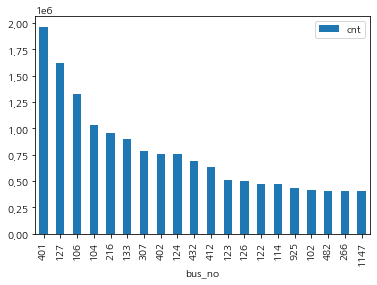

In [406]:
plt.figure(figsize=(15,8))
bus_cnt.head(20).plot.bar(x = "bus_no")

In [407]:
grp_cnt = mybicard.groupby(["dayofweek", "route_nm"]).size().reset_index()
grp_cnt.rename(columns={0:"cnt"}, inplace=True)

In [408]:
grp_cnt = grp_cnt.sort_values(["dayofweek", "cnt"], ascending = False)
grp_cnt_top = grp_cnt.groupby(["dayofweek"]).head(10).reset_index(drop = True)

In [409]:
grp_cnt_top.head()

dayofweek route_nm     cnt
0         화      401  321504
1         화      127  274264
2         화      106  219989
3         화      104  170372
4         화      216  154910

In [410]:
grp_cnt_top = grp_cnt_top.set_index("dayofweek").loc[["월", "화", "수", "목", "금", "토", "일"]].reset_index()

In [415]:
grp_cnt_top.loc[grp_cnt_top["dayofweek"].isin(["월", "일"])]

dayofweek route_nm     cnt
0          월      401  321395
1          월      127  272530
2          월      106  216284
3          월      104  167543
4          월      216  155580
5          월      133  141909
6          월      307  125211
7          월      124  121813
8          월      402  118985
9          월      432  113952
60         일      401  163348
61         일      127  119385
62         일      106  112382
63         일      104   84308
64         일      216   83596
65         일      133   83595
66         일      402   77683
67         일      307   68466
68         일      124   61196
69         일      412   54375

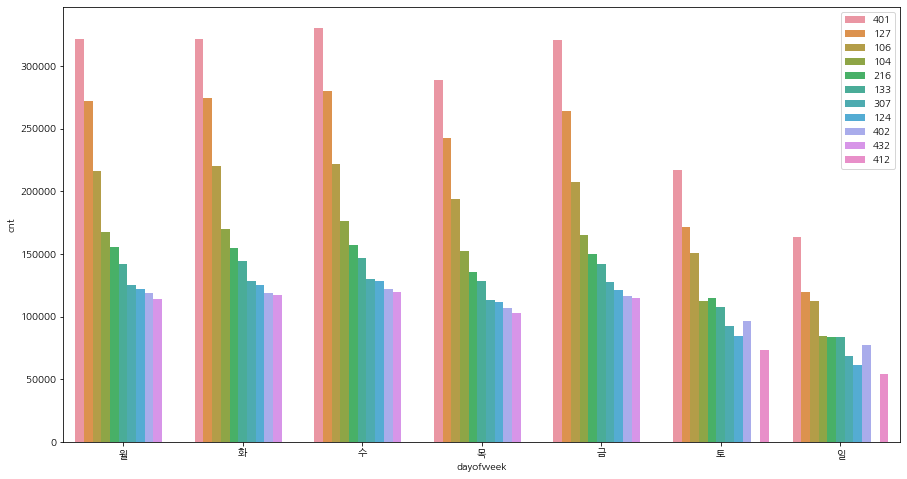

In [413]:
# 요일별로 타는 버스의 패턴은 동일함
plt.figure(figsize=(15,8))
sns.set_palette("deep")
sns.barplot(data = grp_cnt_top, x = "dayofweek", y = "cnt", hue = "route_nm")
plt.legend(loc='upper right')

## 2. 정류장 수
stop_id 수 : 3479 \
stop_nm 수 : 1801 \
stop_nm에 여러 id가 포함된 건수 : 1485

In [282]:
%%time
stop_nm_id_unq = mybicard.groupby("stop_nm")["stop_id"].nunique().reset_index()
stop_nm_id_unq.columns = ["stop_nm", "stop_id_nunq"]

CPU times: user 6.75 s, sys: 429 ms, total: 7.18 s
Wall time: 7.2 s


In [283]:
# 하나의 stop_nm에 여러 id가 포함된 건수
stop_nm_id_unq.loc[stop_nm_id_unq["stop_id_nunq"]>=2,]

stop_nm  stop_id_nunq
0          (?)??             2
3     (?)TCT?2??             2
5     (주)TCT제2공장             2
7          (주)리한             2
14       ?.?????             2
...          ...           ...
1794    효정고등학교입구             2
1795    효청보건고등학교             2
1796          후리             2
1799  휴먼시아.엘크루정문             2
1800     휴먼시아아파트             2

[1485 rows x 2 columns]

In [25]:
mybicard["stop_nm"].value_counts()

공업탑          1311593
시외고속버스터미널     940025
신정시장          596216
신복로터리         558070
?????         538057
              ...   
양등                 1
장천마을               1
디아채                1
옥천암입구              1
현대글로비스             1
Name: stop_nm, Length: 1801, dtype: int64

In [26]:
mybicard["stop_id"].value_counts()

3101421    638661
3101418    496063
3101525    391852
3101347    382185
3101460    370028
            ...  
3103964         1
9103714         1
3101971         1
3103045         1
3103966         1
Name: stop_id, Length: 3479, dtype: int64

## 3. Unique 마이비 카드 id
115,286 \
(참고) 21년 2월 기준 울산광역시 인구 : 113만 2,953명

In [7]:
len(mybicard["mybicardnumber"].unique())

1152876

### 요일별 평균 이용 횟수

In [72]:
day_cnt = mybicard.groupby(["dayofweek"]).agg({"totalcnt" : sum}).reset_index()

In [82]:
day_cnt = day_cnt.set_index("dayofweek").loc[["월", "화", "수", "목", "금", "토", "일"]].reset_index()

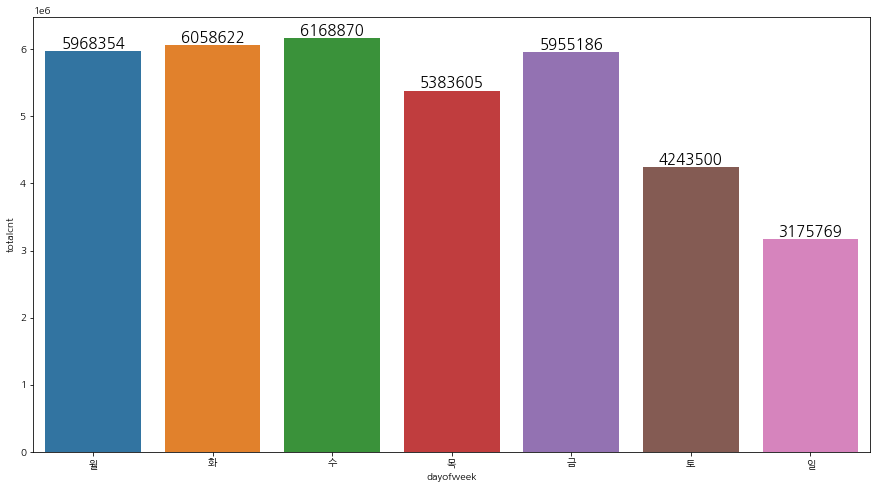

In [112]:
plt.figure(figsize=(15,8))
g = sns.barplot(data = day_cnt, x = "dayofweek", y = "totalcnt")
for _, r in day_cnt.iterrows():
    g.text(r.name, r.totalcnt + 50000, r.totalcnt, color='black', ha="center", size = 15 )

## 401번 버스

### 1. 401번 버스에 대한 데이터

In [250]:
mybicard_401 = mybicard.loc[(mybicard["route_nm"] == "401")].reset_index()

### 정류장 ID 찾기

In [363]:
mybicard_401.loc[(mybicard_401["mybicardnumber"] == "D900608681939") & (mybicard_401["transdate"].dt.date == pd.Timestamp(year=2020,month=4, day = 10))]

index collectdate     seq route_nm           transdate  sumamount  \
25279  442944  2020-04-10   33168      401 2020-04-10 15:37:13          0   
25361  444509  2020-04-10  101980      401 2020-04-10 15:44:57          0   

       stop_nm  stop_id  normalcnt  studentcnt  studentamount  childcnt  \
25279      공업탑  3101418          1           0              0         0   
25361  보건환경연구원  3100106          1           0              0         0   

       childamount transflag mybicardnumber  base_ymd dayofweek  day  month  \
25279            0        환승  D900608681939  20200410         금   10      4   
25361            0        하차  D900608681939  20200410         금   10      4   

       total_cnt  
25279          1  
25361          1

In [365]:
mybicard_401.loc[(mybicard_401["route_nm"] == "401") & (mybicard_401["stop_nm"] == "남목1동행정복지센터") & (mybicard_401["transflag"] == "하차")]

index collectdate     seq route_nm           transdate  sumamount  \
11686      202415  2020-04-09   12733      401 2020-04-09 08:43:01          0   
35317      622178  2020-04-11    1719      401 2020-04-11 18:19:09          0   
148520    2604796  2020-05-01   23545      401 2020-05-01 23:16:12          0   
221219    3918511  2020-05-12  150913      401 2020-05-12 08:02:12          0   
368730    6572729  2020-06-01   48446      401 2020-06-01 12:52:55          0   
440181    7938707  2020-06-08  187546      401 2020-06-08 08:03:53          0   
443298    8000497  2020-06-08  180710      401 2020-06-08 12:36:21          0   
542140    9903221  2020-06-17   22083      401 2020-06-17 10:59:01          0   
675061   12485540  2020-06-29  108485      401 2020-06-29 15:56:51          0   
675062   12485542  2020-06-29  133178      401 2020-06-29 15:56:52          0   
675063   12485549  2020-06-29   12827      401 2020-06-29 15:56:54          0   
701216   13000938  2020-07-01  232304      401 2020-07-01 18:11:26          0   
882728   16414967  2020-07-17   39107      401 2020-07-17 15:22:29          0   
894636   16633605  2020-07-18   52915      401 2020-07-18 14:58:15          0   
1104565  20576173  2020-08-06  103416      401 2020-08-06 22:03:08          0   
1180753  21969570  2020-08-14   11056      401 2020-08-14 20:28:43          0   
1234223  22928038  2020-08-21  153634      401 2020-08-21 11:40:27          0   
1297019  24032519  2020-08-31   28705      401 2020-08-31 08:49:45          0   
1387269  25667984  2020-09-10  199232      401 2020-09-10 09:52:34          0   
1469277  27195511  2020-09-18  189162      401 2020-09-18 16:19:27          0   
1568929  28994473  2020-09-28  194621      401 2020-09-28 10:42:24          0   
1568930  28994523  2020-09-28  176489      401 2020-09-28 10:42:38          0   
1582211  29231041  2020-09-29   61277      401 2020-09-29 11:12:27          0   
1687990  31100487  2020-10-11   88873      401 2020-10-11 19:35:37          0   
1704235  31377433  2020-10-13  115739      401 2020-10-13 08:19:26          0   
1781421  32746305  2020-11-04  190879      401 2020-11-04 10:10:19          0   
1793744  32960793  2020-11-05  219269      401 2020-11-05 08:31:22          0   

            stop_nm  stop_id  normalcnt  studentcnt  studentamount  childcnt  \
11686    남목1동행정복지센터  3100101          1           0              0         0   
35317    남목1동행정복지센터  3100101          1           0              0         0   
148520   남목1동행정복지센터  3100101          1           0              0         0   
221219   남목1동행정복지센터  3100101          1           0              0         0   
368730   남목1동행정복지센터  3100101          1           0              0         0   
440181   남목1동행정복지센터  3100101          1           0              0         0   
443298   남목1동행정복지센터  3100101          1           0              0         0   
542140   남목1동행정복지센터  3100101          1           0              0         0   
675061   남목1동행정복지센터  3100101          1           0              0         0   
675062   남목1동행정복지센터  3100101          1           0              0         0   
675063   남목1동행정복지센터  3100101          1           0              0         0   
701216   남목1동행정복지센터  3100101          1           0              0         0   
882728   남목1동행정복지센터  3100101          1           0              0         0   
894636   남목1동행정복지센터  3100101          1           0              0         0   
1104565  남목1동행정복지센터  3100101          1           0              0         0   
1180753  남목1동행정복지센터  3100101          1           0              0         0   
1234223  남목1동행정복지센터  3100101          1           0              0         0   
1297019  남목1동행정복지센터  3100101          1           0              0         0   
1387269  남목1동행정복지센터  3100101          1           0              0         0   
1469277  남목1동행정복지센터  3100101          1           0              0         0   
1568929  남목1동행정복지센터  3100101          1           0            

In [361]:
mybicard_401.loc[(mybicard_401["transdate"].dt.hour.between(2,6)) & (mybicard_401["stop_nm"] == "보건환경연구원")].sort_values("transdate")

index collectdate     seq route_nm           transdate  sumamount  \
1440583  26666778  2020-09-16  201484      401 2020-09-16 06:53:55          0   
1537502  28420514  2020-09-25   41823      401 2020-09-25 06:33:50          0   
1654544  30487865  2020-10-08  182481      401 2020-10-08 06:29:32          0   
1654753  30490928  2020-10-08   24329      401 2020-10-08 06:50:39          0   
1728579  31803830  2020-10-29   42155      401 2020-10-29 06:47:54          0   
1751712  32219098  2020-11-02  188541      401 2020-11-02 06:36:11          0   

         stop_nm  stop_id  normalcnt  studentcnt  studentamount  childcnt  \
1440583  보건환경연구원  3100106          1           0              0         0   
1537502  보건환경연구원  3100106          1           0              0         0   
1654544  보건환경연구원  3100106          1           0              0         0   
1654753  보건환경연구원  3100106          1           0              0         0   
1728579  보건환경연구원  3100106          1           0              0         0   
1751712  보건환경연구원  3100106          1           0              0         0   

         childamount transflag mybicardnumber  base_ymd dayofweek  day  month  \
1440583            0        하차  D900612762975  20200916         수   16      9   
1537502            0        하차  D900612762975  20200925         금   25      9   
1654544            0        하차  D900612762975  20201008         목    8     10   
1654753            0        하차  D900634151702  20201008         목    8     10   
1728579            0        하차  D900620888799  20201029         목   29     10   
1751712            0        하차  D900649548185  20201102         월    2     11   

         total_cnt  
1440583          1  
1537502          1  
1654544          1  
1654753          1  
1728579          1  
1751712          1

In [367]:
mybicard_401.loc[mybicard_401["stop_nm"].str.contains("남목1동행정복지센터"), ["stop_nm", "stop_id"]].drop_duplicates()

stop_nm  stop_id
234  남목1동행정복지센터  3100101

In [241]:
mybicard_401.iloc[[17278,23707]]

index collectdate     seq route_nm           transdate  sumamount  \
17278  3323395  2020-05-08  192948      401 2020-05-08 13:59:55       1250   
23707  3435335  2020-05-08   90067      401 2020-05-08 22:28:36       1250   

      stop_nm  stop_id  normalcnt  studentcnt  studentamount  childcnt  \
17278     정수장  3101392          1           0              0         0   
23707     정수장  3101405          1           0              0         0   

       childamount transflag mybicardnumber  base_ymd dayofweek  day  month  \
17278            0       비환승  D900026156174  20200508         금    8      5   
23707            0       비환승  D100592915827  20200508         금    8      5   

       total_cnt  
17278          1  
23707          1

### 401번 버스의 정류장별 탑승 횟수

In [82]:
stop_cnt_401 = mybicard_401.groupby(["stop_id", "stop_nm"])["total_cnt"].sum().reset_index()

<AxesSubplot:xlabel='stop_nm', ylabel='total_cnt'>

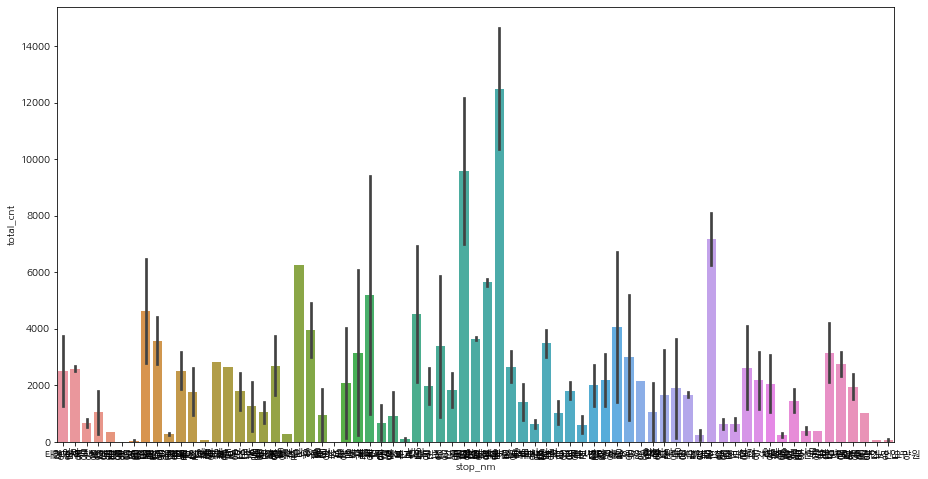

In [85]:
plt.figure(figsize=(15,8))
sns.barplot(data = stop_cnt_401, x = "stop_nm", y = "total_cnt")

In [70]:
len(mybicard_401["stop_nm"].unique())

69

### 401번 버스의 요일별 탑승인원 (10분 간격)

#### 10분 단위 탑승자 집계

In [94]:
# 21948
mybicard_401_agg_10m = (mybicard_401.loc[(mybicard_401["transflag"] != "하차")]
                                   .groupby(["route_nm", 
                                             pd.Grouper(key="transdate", freq='10Min')])
                                   .agg({"totalcnt" : sum})
                                   .reset_index())

In [182]:
def plot_week_cnt(data, start_dt = "2020-04-20"):
    data_grp = (data.loc[(data["transflag"] != "하차")]
                    .groupby(["route_nm", 
                              pd.Grouper(key="transdate", freq='10Min')])
                    .agg({"totalcnt" : sum})
                    .reset_index())
    

    start_dt = datetime.strptime(start_dt, "%Y-%m-%d") + timedelta(hours=5)
    end_dt = start_dt + timedelta(days=6, hours = 19)
    
    data_grp = data_grp.loc[data_grp["transdate"].between(start_dt,
                                                          end_dt)]    
    
    plt.figure(figsize=(30,8))
    g = sns.lineplot(data = data_grp, x = "transdate", y = "totalcnt")
    
    g.set(xlim=(start_dt - timedelta(hours=5,minutes=30), end_dt + timedelta(hours=5)))
    g.xaxis.set_minor_locator(mdates.HourLocator(interval=6))
    g.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M\n'))
    g.xaxis.set_major_locator(mdates.DayLocator())
    g.xaxis.set_major_formatter(mdates.DateFormatter('\n%b %d'))

    plt.show()

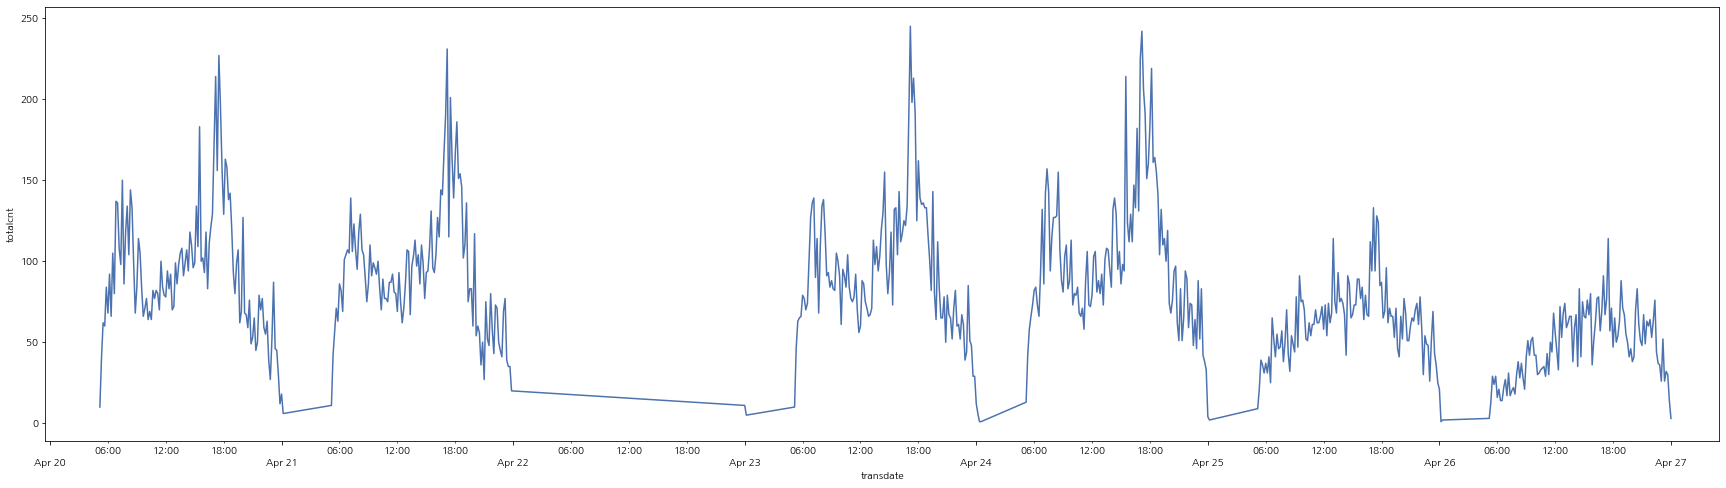

In [421]:
plot_week_cnt(data = mybicard_401, start_dt = "2020-04-20")

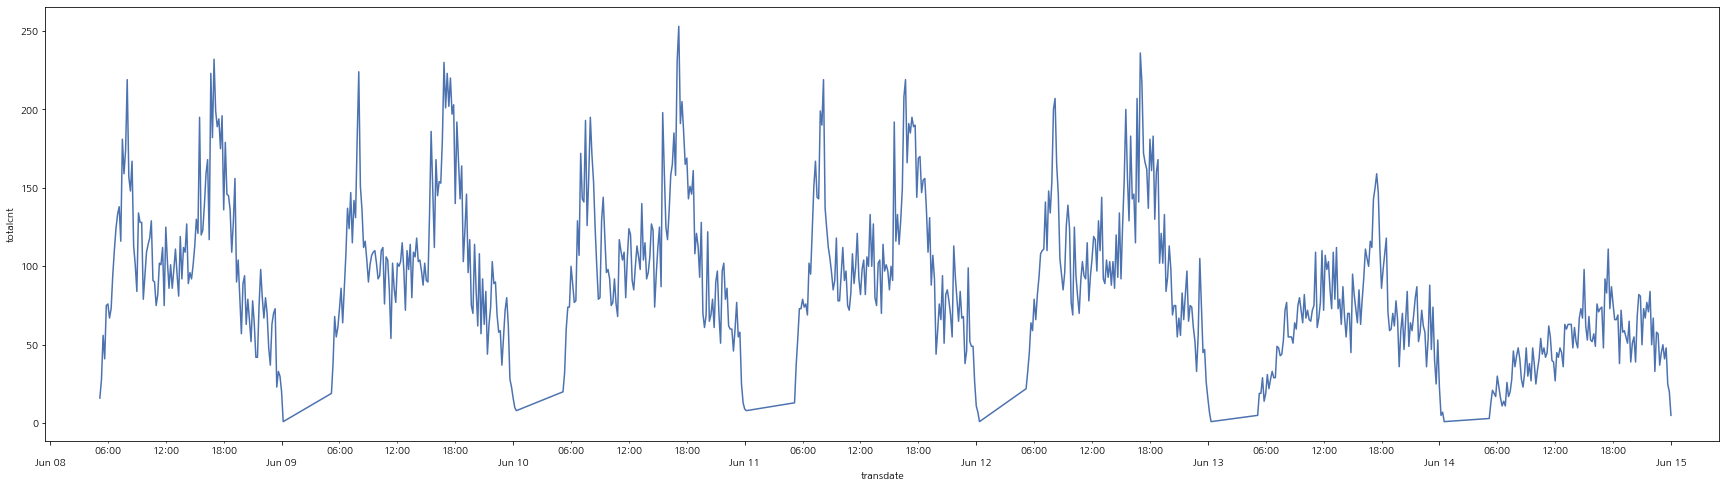

In [420]:
plot_week_cnt(data = mybicard_401, start_dt = "2020-06-08")

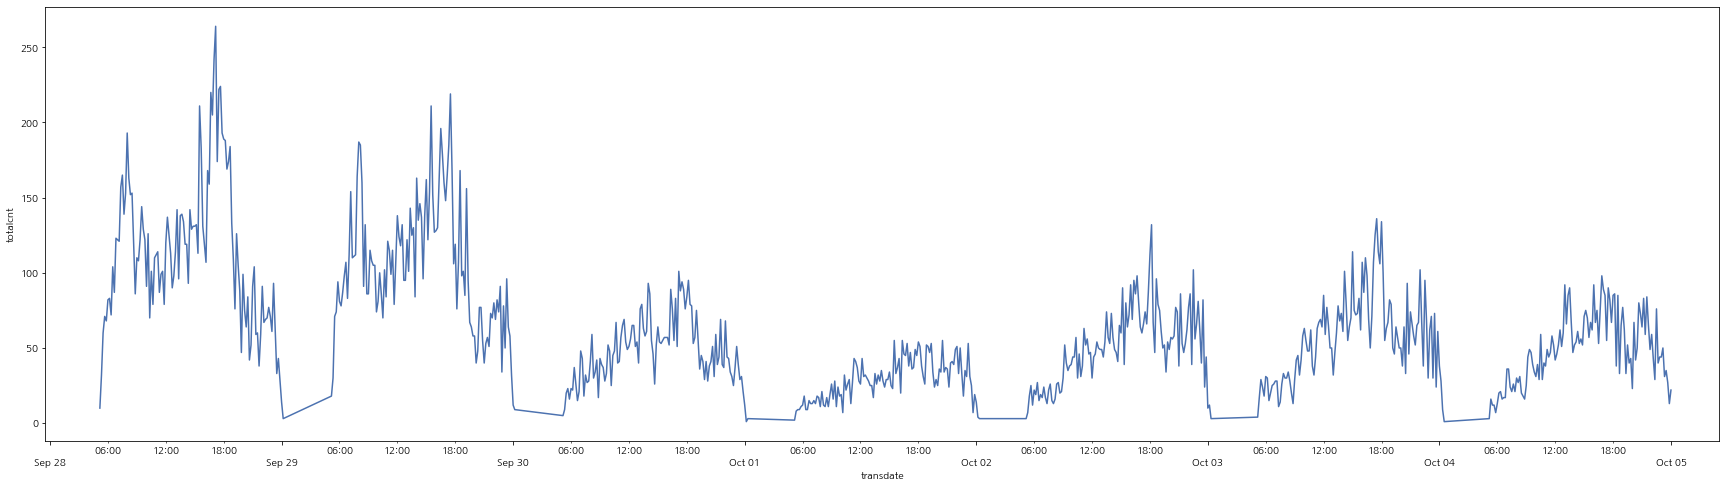

In [419]:
plot_week_cnt(data = mybicard_401, start_dt = "2020-09-28")

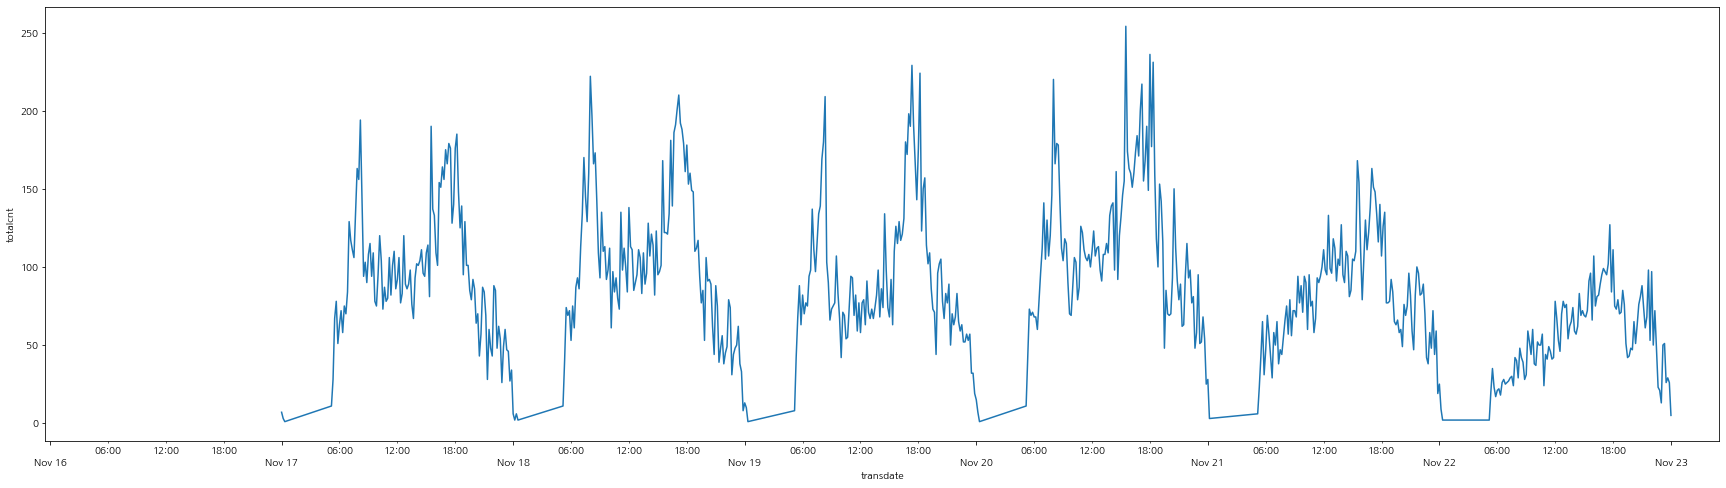

In [186]:
plot_week_cnt(data = mybicard_401, start_dt = "2020-11-16")

### 월별 탑승 인원 추세

In [66]:
collect_days = count_by_date.loc[count_by_date["cnt"] != 0].groupby(pd.Grouper(key="transdate", freq = "M")).size().reset_index(name = "max_days")

In [67]:
# 13798
mybicard_401_agg_1M = (mybicard_401.loc[(mybicard_401["transflag"] != "하차")]
                                   .groupby(["route_nm", 
#                                              "stop_nm", 
#                                              "stop_id", 
#                                              "longitude", 
#                                              "latitude", 
#                                              "dayofweek",
#                                              "hour",
                                             pd.Grouper(key="transdate", freq='M')])
                                   .agg({"totalcnt" : sum})
                                   .reset_index())

In [68]:
mybicard_401_agg_1M = pd.merge(mybicard_401_agg_1M, collect_days, on = "transdate", how = "inner" )
mybicard_401_agg_1M["mean_cnt"] = mybicard_401_agg_1M["totalcnt"]/mybicard_401_agg_1M["max_days"]

In [69]:
mybicard_401_agg_1M

route_nm  transdate  totalcnt  max_days      mean_cnt
0      401 2020-04-30    139181        15   9278.733333
1      401 2020-05-31    222708        22  10123.090909
2      401 2020-06-30    325604        30  10853.466667
3      401 2020-07-31    353947        31  11417.645161
4      401 2020-08-31    254036        26   9770.615385
5      401 2020-09-30    285996        30   9533.200000
6      401 2020-10-31    153301        16   9581.312500
7      401 2020-11-30    214794        20  10739.700000

In [ ]:
	route_nm	transdate	totalcnt	max_days	mean_cnt
0	401	2020-04-30	139181	15	9278.733333
1	401	2020-05-31	222708	22	10123.090909
2	401	2020-06-30	325604	30	10853.466667
3	401	2020-07-31	353947	31	11417.645161
4	401	2020-08-31	254036	26	9770.615385
5	401	2020-09-30	285996	30	9533.200000
6	401	2020-10-31	153301	16	9581.312500
7	401	2020-11-30	214794	20	10739.700000

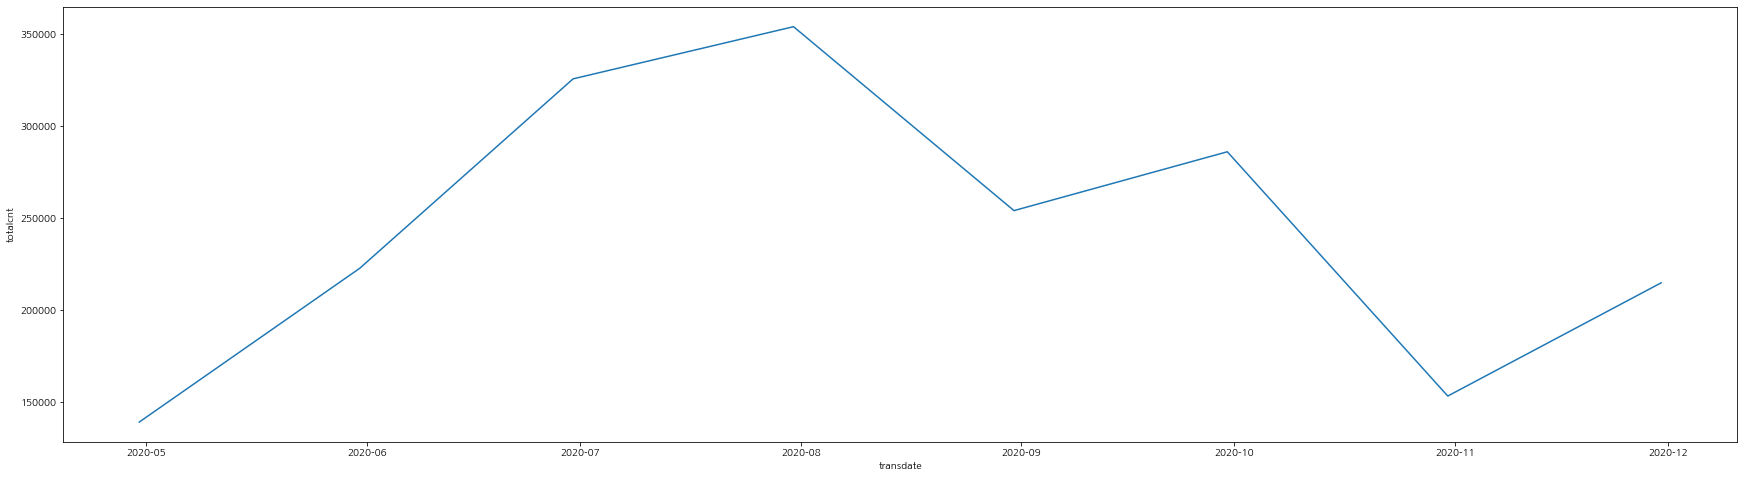

In [80]:
plt.figure(figsize=(30,8))
g = sns.lineplot(data = mybicard_401_agg_1M, x = "transdate", y = "totalcnt")

[(5000.0, 15000.0)]

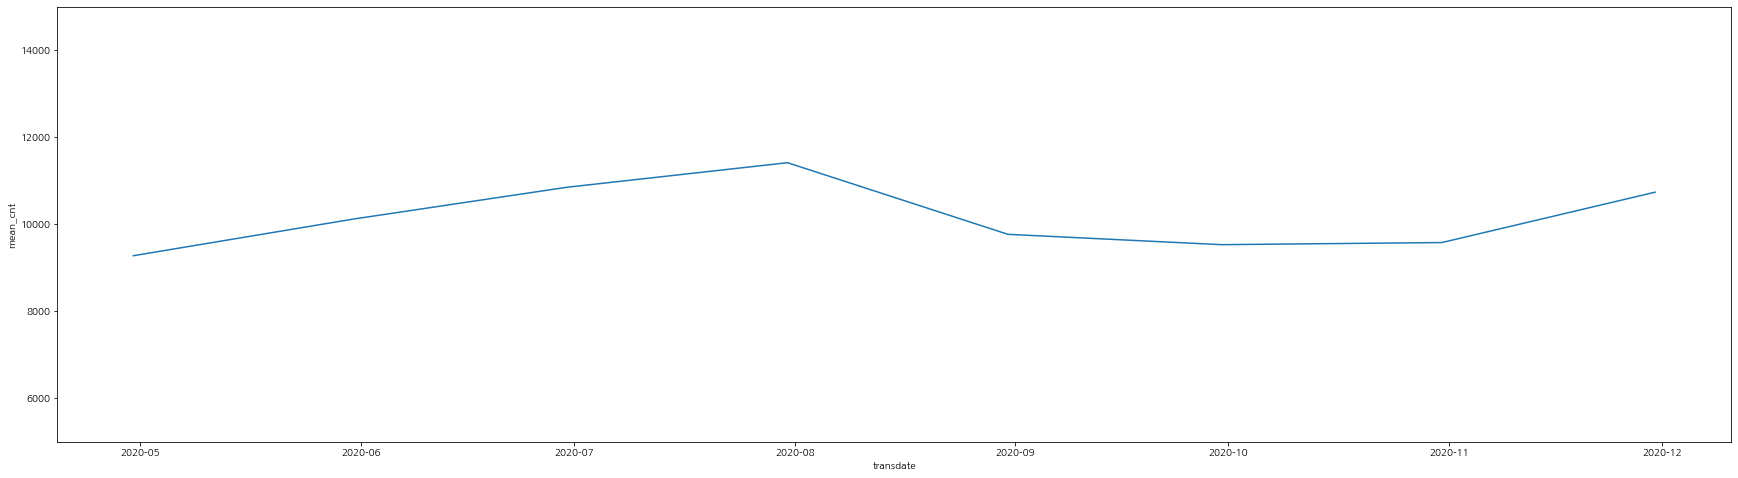

In [77]:
plt.figure(figsize=(30,8))
g = sns.lineplot(data = mybicard_401_agg_1M, x = "transdate", y = "mean_cnt")
g.set(ylim=(5000, 15000))

### 버스 정류소 위치 정보 데이터

In [257]:
# 경주시, 양산시, 울산광역시, 부산광역시
bus_stop = pd.read_csv("/home/seho/data/울산광역시_버스 정류소 위치 정보_20200531.csv", encoding = "euc-kr")
bus_stop = bus_stop.loc[bus_stop["권역"] == "울산광역시"]
bus_stop.columns = ["stop_nm", "stop_id", "longitude", "latitude", "city"]

In [258]:
bus_stop_401_1 = pd.read_csv("/home/seho/data/401_율리_꽃바위.csv", encoding = "euc_kr")
bus_stop_401_2 = pd.read_csv("/home/seho/data/401_꽃바위_율리.csv", encoding = "euc_kr")
bus_stop_401 = pd.concat([bus_stop_401_1, bus_stop_401_2])
bus_stop_401.columns = ["mybi_stop_id", "stop_id"]

In [259]:
# 마이비 정류장 ID -> 공공 데이터 정류쟝 ID로 매핑
mybicard_401 = pd.merge(mybicard_401, bus_stop_401, on = "mybi_stop_id", how = "inner")

In [260]:
mybicard_401 = pd.merge(mybicard_401, bus_stop[["stop_id", "longitude", "latitude"]], on = "stop_id")

### Folium을 통한 지도 히트맵

In [424]:
import folium
from folium.plugins import HeatMap

### 60분단위 집계

In [425]:
# 314862
mybicard_401_agg_1h = (mybicard_401.loc[mybicard_401["transflag"] != "하차"]
                                   .groupby(["route_nm", 
                                             "stop_nm", 
                                             "stop_id", 
                                             "longitude", 
                                             "latitude", 
                                             "dayofweek",
                                             "hour",
                                             pd.Grouper(key="transdate", freq='60Min')])
                                   .agg({"totalcnt" : sum})
                                   .reset_index())

In [426]:
temp = mybicard_401_agg_1h.loc[(mybicard_401_agg_1h["dayofweek"] == "월") & (mybicard_401_agg_1h["hour"].between(0,24))]

In [427]:
f = folium.Figure(width=1600, height=700)
m = folium.Map([35.539302, 129.338169], zoom_start=13, width=1600, height=700)

In [428]:
HeatMap(temp[['latitude','longitude']]).add_to(m)

In [430]:
HeatMap(temp[['latitude','longitude']]).add_to(m)

f.add_child(m)

## 날씨 데이터

In [382]:
weather_data = pd.read_parquet("/home/seho/data/weather_2018.parquet")

In [383]:
weather_data = weather_data.loc[:, ["tm", "ta", "hm", "rn", "dc10Tca",  "dsnw", "wd", "ws"]]
weather_data = weather_data.rename(columns = {"tm" : "시간",
                                              "ta" : "기온",
                                              "hm" : "습도",
                                              "rn" : "강수량",
                                              "dc10Tca" : "전운량",
                                              "dsnw" : "적설량",
                                              "wd" : "풍향",
                                              "ws" : "풍속"})
weather_data["시간"] = pd.to_datetime(weather_data["시간"], format = "%Y-%m-%d %H:%M")

In [384]:
for col in weather_data.columns:
    if col == "시간":
        continue
    print(col)
    weather_data[col] = weather_data[col].replace("", "0.0").astype(float)
    weather_data[col] = weather_data[col].astype(float)

기온
습도
강수량
전운량
적설량
풍향
풍속


In [385]:
weather_data["time_hours"] = weather_data["시간"].dt.strftime("%Y-%m-%d %H")

In [386]:
mybicard_401["transdate_hours"] = mybicard_401["transdate"].dt.strftime("%Y-%m-%d %H")

In [387]:
mybicard_401_wt = pd.merge(mybicard_401, weather_data, left_on = "transdate_hours", right_on = "time_hours")
mybicard_401_wt = mybicard_401_wt.drop(["transdate_hours", "time_hours", "시간"], 1)

### 기온과 탑승률의 상관관계

In [432]:
pd.set_option("display.max_columns", None)

In [433]:
mybicard_401_agg_1h = (mybicard_401_wt.loc[mybicard_401["transflag"] != "하차"]
                                   .groupby([pd.Grouper(key="transdate", freq='60Min')])
                                   .agg({"totalcnt" : sum,
                                         "기온" : np.mean,
                                         "습도" : np.mean,
                                         "강수량" : np.mean,
                                         "적설량" : np.mean
                                         })
                                   .reset_index())

<AxesSubplot:xlabel='기온', ylabel='totalcnt'>

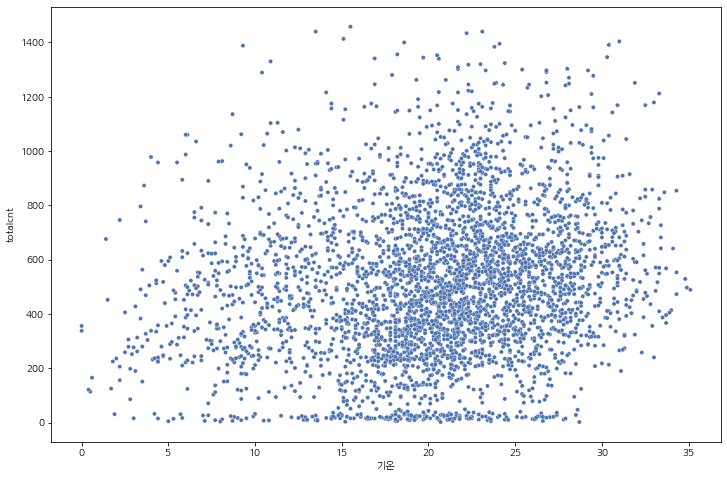

In [437]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = mybicard_401_agg_1h, x = "기온", y = "totalcnt", size = 3, legend=False)

<AxesSubplot:xlabel='습도', ylabel='totalcnt'>

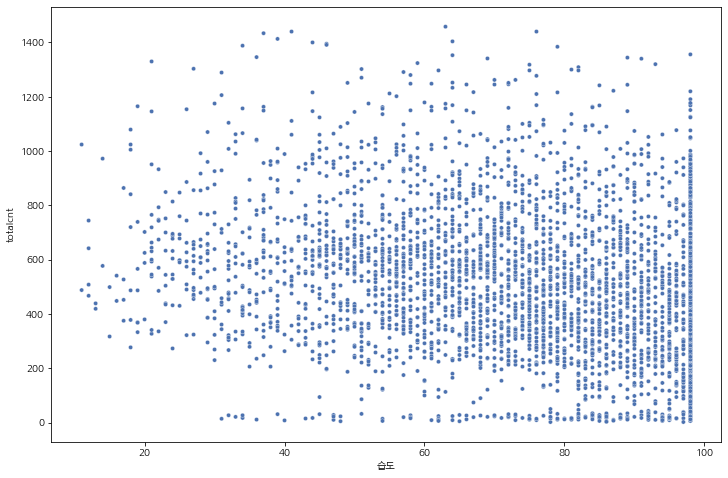

In [438]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = mybicard_401_agg_1h, x = "습도", y = "totalcnt", size = 3, legend=False)

<AxesSubplot:xlabel='강수량', ylabel='totalcnt'>

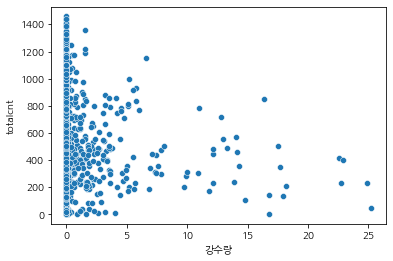

In [397]:
sns.scatterplot(data = mybicard_401_agg_1h, x = "강수량", y = "totalcnt")

<AxesSubplot:xlabel='적설량', ylabel='totalcnt'>

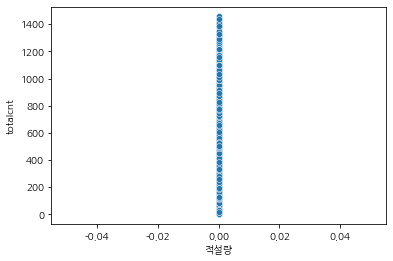

In [398]:
sns.scatterplot(data = mybicard_401_agg_1h, x = "적설량", y = "totalcnt")